In [1]:
!pip install numpy==1.21.4

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
np.__version__

'1.21.4'

In [4]:
data = pd.read_csv("./datasets/Mall_Customers.csv")

In [5]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
data.drop("CustomerID", axis=1, inplace=True)

In [7]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [8]:
standart_scaler = StandardScaler()
scaled_data = pd.DataFrame(standart_scaler.fit_transform(data), columns=data.columns)

In [9]:
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [10]:
max_clusters= 50

In [11]:
kmeans_tests = [KMeans(n_clusters=i, n_init=10) for i in range(2, max_clusters)]
inertias = [kmeans_tests[i].fit(scaled_data).inertia_ for i in range(len(kmeans_tests))]

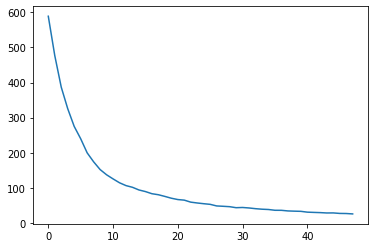

In [12]:
plt.plot(inertias)

In [13]:
model = KMeans(n_clusters=9, n_init=10)
model.fit(scaled_data)

KMeans(n_clusters=9)

In [14]:
clusters = model.predict(scaled_data)

In [15]:
pca = PCA(n_components=2)
reduced_data = pd.DataFrame(pca.fit_transform(scaled_data), columns=["PCA1", "PCA2"])

In [16]:
reduced_data['cluster'] = clusters

In [17]:
reduced_data

,PCA1,PCA2,cluster
0,-0.406383,-0.520714,6
1,-1.427673,-0.367310,6
2,0.050761,-1.894068,7
3,-1.694513,-1.631908,4
4,-0.313108,-1.810483,7
...,...,...,...
195,-1.179572,1.324568,3
196,0.672751,1.221061,8
197,-0.723719,2.765010,2
198,0.767096,2.861930,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'PCA2')

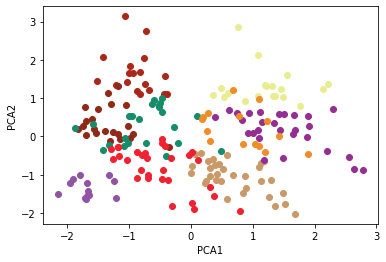

In [18]:
for i in range(9):
    tmp_df = reduced_data.loc[reduced_data['cluster'] == i]
    randomRGB = np.random.rand(3,)
    plt.scatter(tmp_df['PCA1'], tmp_df['PCA2'], c=randomRGB)
    
plt.xlabel("PCA1")
plt.ylabel("PCA2")